# **START**

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from vipbege.pulse import Pulse
from vipbege.pulse_batch import PulseGenerator, PulseBatch, DataParser

# **2021 Data**

## load data

In [ ]:
with open('path/to/data', 'rb') as f:
    df21 = pickle.load(f)

## **Rise time**

### single pulse ###

In [129]:
i=10714
print(i)
pulse_data21 = df21.iloc[i]['original_pulse']

pulse21 = Pulse(pulse_data21)
trise21 = pulse21.find_rise_time()
trise21

10714


(0.265, 0.5025000000000001, 0.7675000000000001)

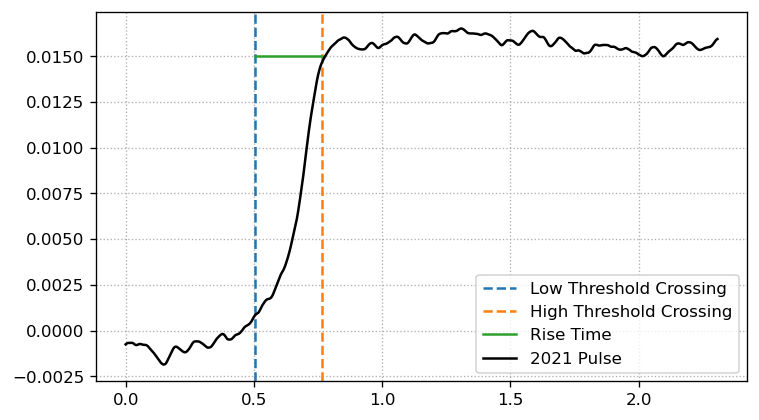

In [130]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(trise21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(trise21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([trise21[1], trise21[1] + trise21[0]], [0.015, 0.015], color='C2', label='Rise Time')

ax.plot(pulse21.time, pulse21.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [131]:
pulses_data21 = np.stack(df21['original_pulse'])
pulses21 = PulseBatch(pulses_data21)
pulses_data21.shape

(22377, 924)

In [132]:
tsrise21 = pulses21.find_rise_times()
print(tsrise21[0][i], tsrise21[1][i], tsrise21[2][i])

0.265 0.5025000000000001 0.7675000000000001


## **Peak/FWHM Time**

### peak time

#### single pulse

In [133]:
pulse21 = Pulse(pulse_data21)
*tpeak21, peakNorm21 = pulse21.find_peak_fwhm_time(return_norm=True)
tpeak21

[0.04124235586282865, 0.6823140188393131, 0.7235563747021417]

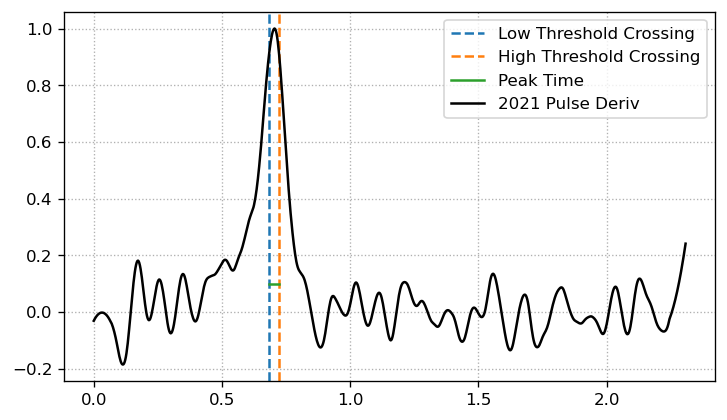

In [134]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tpeak21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tpeak21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tpeak21[1], tpeak21[1] + tpeak21[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse21.time, peakNorm21, label='2021 Pulse Deriv', color='black')

ax.legend()

#### pulse batch

In [135]:
*tspeak21, peakNorms21 = pulses21.find_peak_fwhm_times(return_norm=True)
tspeak21[0][i],tspeak21[1][i],tspeak21[2][i]

no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found


(0.04124235586282865, 0.6823140188393131, 0.7235563747021417)

### fwhm time

#### single pulse

In [136]:
pulse21 = Pulse(pulse_data21)
*tfwhm21, fwhmNorm21 = pulse21.find_peak_fwhm_time(type='fwhm', return_norm=True)
tfwhm21

[0.11099027254479754, 0.6434352263888441, 0.7544254989336416]

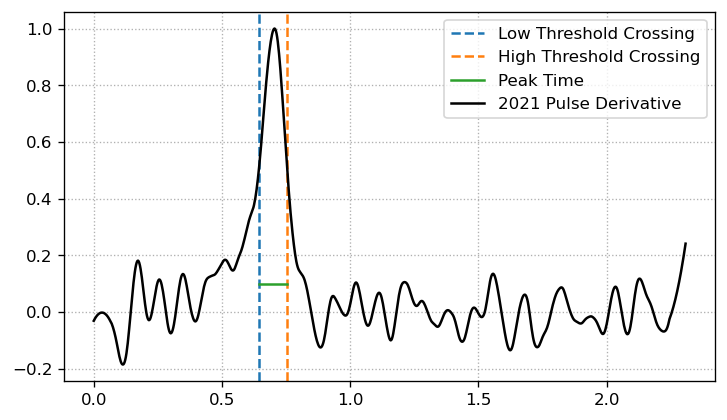

In [137]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tfwhm21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tfwhm21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tfwhm21[1], tfwhm21[1] + tfwhm21[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse21.time, fwhmNorm21, label='2021 Pulse Derivative', color='black')

ax.legend()

#### pulse batch

In [138]:
*tsfwhm21, _ = pulses21.find_peak_fwhm_times(type='fwhm', return_norm=True)
tsfwhm21[0][i],tsfwhm21[1][i],tsfwhm21[2][i]

no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found


(0.11099027254479754, 0.6434352263888441, 0.7544254989336416)

## **Normalize pulse**

#### single pulse

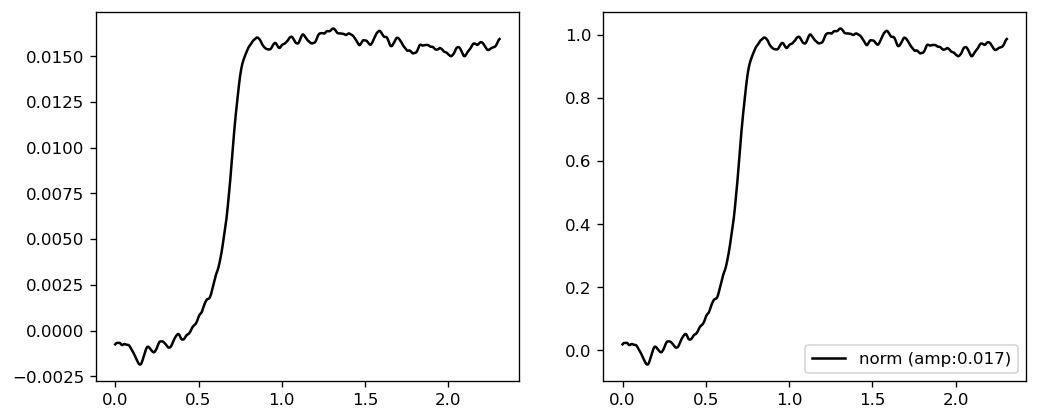

In [139]:
pulse21 = Pulse(pulse_data21)
norm21, amp = pulse21.normalize_pulse(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulse21.time, pulse21.data, color='black')
ax[1].plot(pulse21.time, norm21, label=f'norm (amp:{amp:.3f})', color='black')
ax[1].legend()

#### pulse batch

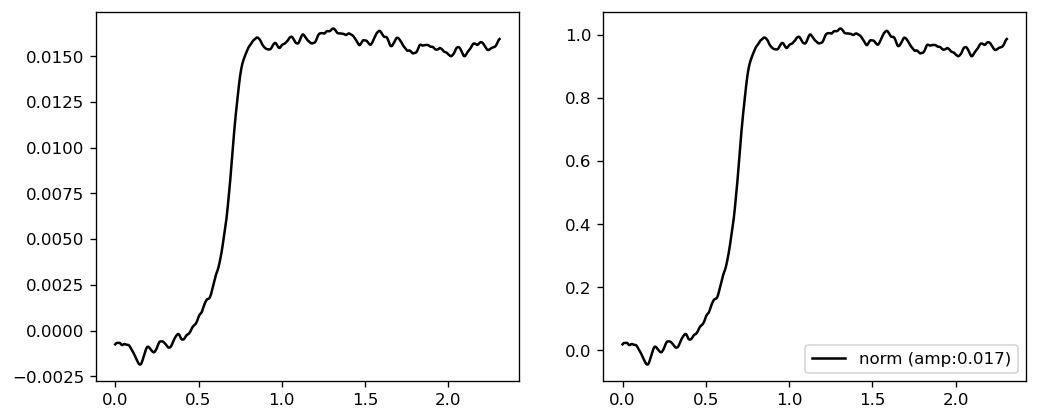

In [140]:
norms21, amps = pulses21.normalize_pulses(return_amp=True)
fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulses21.time, pulses21.data[i], color='black')
ax[1].plot(pulses21.time, norms21[i], label=f'norm (amp:{amps[i]:.3f})', color='black')
ax[1].legend()

## **find peaks**

### single pulse

In [141]:
pulse21 = Pulse(pulse_data21)
peaks21 = pulse21.count_peaks()
peaks21

1

### pulse batch

In [142]:
peakss21 = pulses21.count_peaks()
peakss21[i]

1

## **L1 norm**

### single pulse

In [143]:
pulse_ref21 = Pulse(df21.iloc[4154]['original_pulse'])
pulse21 = Pulse(pulse_data21)
l1_norm21 = pulse21.l1_norm(reference_pulse=pulse_ref21)
l1_norm21

12.689951673483058

### pulse batch

In [144]:
l1_norms21 = pulses21.l1_norm(reference_pulse=pulse_ref21)
l1_norms21[i]

12.689951673483058

## **Normalize derivative**

### single pulse

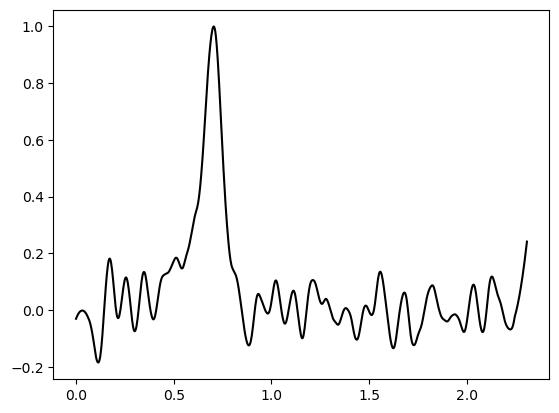

In [145]:
pulse21 = Pulse(pulse_data21)
deriv21 = pulse21.normalize_deriv()
plt.plot(pulse21.time, deriv21, color='black')
plt.show()

### pulse batch

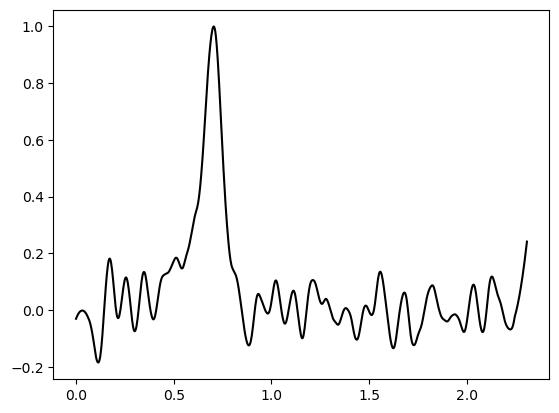

In [146]:
pulses21 = PulseBatch(pulses_data21)
derivs21 = pulses21.normalize_deriv()
plt.plot(pulse21.time, derivs21[i], color='black')
plt.show()

# **2022 Data**

## load data

In [ ]:
df22 = pd.read_csv("path/to/data")
df22

## **Rise time**

### single pulse

In [ ]:
j=np.random.choice(len(df22))
print(j)
pulse_data22 = df22.iloc[j].values
pulse22 = Pulse(pulse_data22)
trise22 = pulse22.find_rise_time()
trise22

31004


(0.255, 0.7424999999999999, 0.9974999999999999)

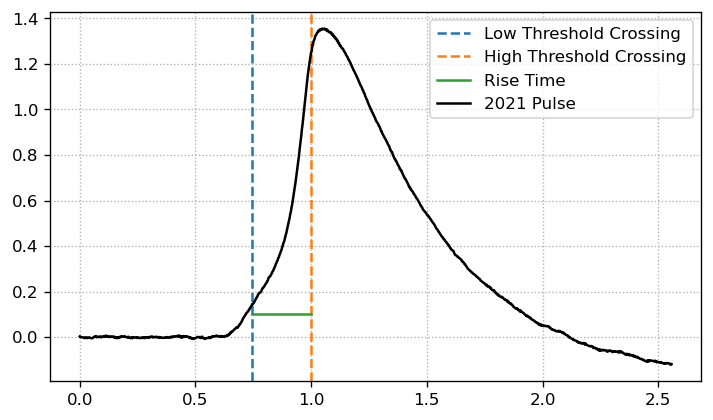

In [149]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(trise22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(trise22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([trise22[1], trise22[1] + trise22[0]], [0.1, 0.1], color='C2', label='Rise Time')

ax.plot(pulse22.time, pulse22.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [150]:
pulses_data22 = np.stack(df22.to_numpy())
pulses22 = PulseBatch(pulses_data22)
pulses_data22.shape

(42259, 1024)

In [151]:
tsrise22 = pulses22.find_rise_times()
print(tsrise22[0][j], tsrise22[1][j], tsrise22[2][j])

0.255 0.7424999999999999 0.9974999999999999


## **Decay time**

### single pulse

In [152]:
tdecay = pulse22.find_decay_time()
tdecay

(0.7149999999999999, 1.1625, 1.8775)

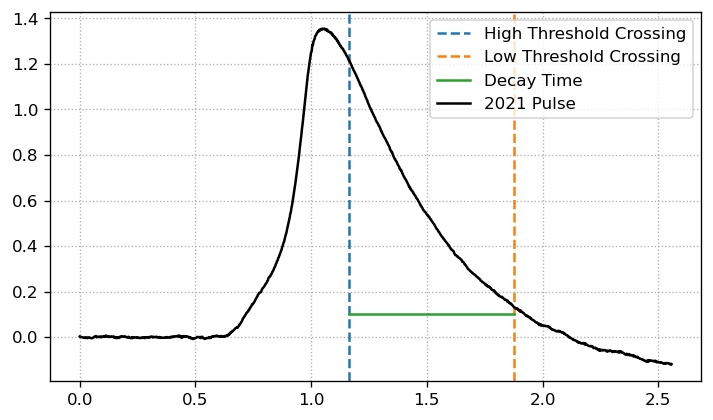

In [153]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tdecay[1], color='C0', linestyle='--', label='High Threshold Crossing')
ax.axvline(tdecay[2], color='C1', linestyle='--', label='Low Threshold Crossing')
ax.plot([tdecay[1], tdecay[1] + tdecay[0]], [0.1, 0.1], color='C2', label='Decay Time')

ax.plot(pulse22.time, pulse22.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [154]:
tsdecay = pulses22.find_decay_times()
tsdecay[0][j], tsdecay[1][j], tsdecay[2][j]

(0.7149999999999999, 1.1625, 1.8775)

## **Peak/FWHM time**

### peak time

#### single pulse

In [155]:
*tpeak22, peakNorm22 = pulse22.find_peak_fwhm_time(peak_deriv=False, time_space='pulse', return_norm=True)
tpeak22

[0.1741216045699815, 0.9933348355992094, 1.167456440169191]

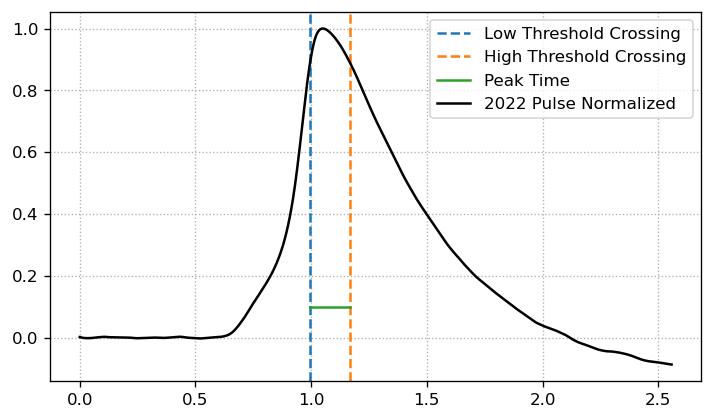

In [156]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tpeak22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tpeak22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tpeak22[1], tpeak22[1] + tpeak22[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse22.time, peakNorm22, label='2022 Pulse Normalized', color='black')

ax.legend()

#### pulse batch

In [157]:
*tspeak22, _ = pulses22.find_peak_fwhm_times(peak_deriv=False, time_space='pulse', return_norm=True)
tspeak22[0][j], tspeak22[1][j], tspeak22[2][j]

no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found


(0.1741216045699815, 0.9933348355992094, 1.167456440169191)

### fwhm time

#### single pulse

In [158]:
*tfwhm22, fwhmNorm22 = pulse22.find_peak_fwhm_time(type='fwhm', peak_deriv=False, time_space='pulse', return_norm=True)
tfwhm22

[0.5280496472169837, 0.9233566315107237, 1.4514062787277073]

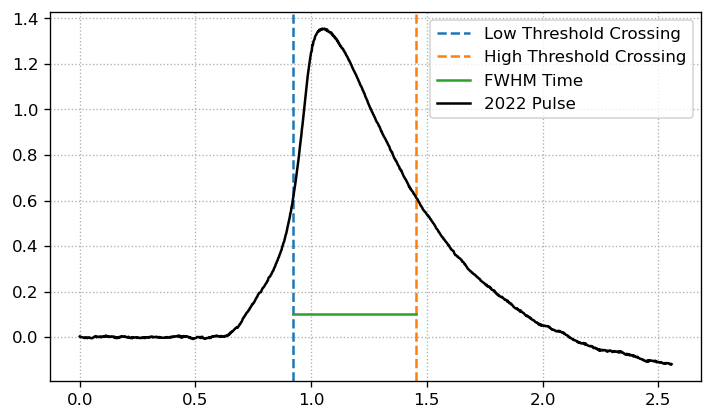

In [159]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tfwhm22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tfwhm22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tfwhm22[1], tfwhm22[1] + tfwhm22[0]], [0.1, 0.1], color='C2', label='FWHM Time')

ax.plot(pulse22.time, pulse22.data, label='2022 Pulse', color='black')

ax.legend()

#### pulse batch

In [160]:
tsfwhm22 = pulses22.find_peak_fwhm_times(type='fwhm', peak_deriv=False, time_space='pulse', return_norm=False)
tsfwhm22[0][j], tsfwhm22[1][j], tsfwhm22[2][j]

no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found
no peaks found


(0.5280496472169837, 0.9233566315107237, 1.4514062787277073)

## **Normalize pulse**

#### single pulse

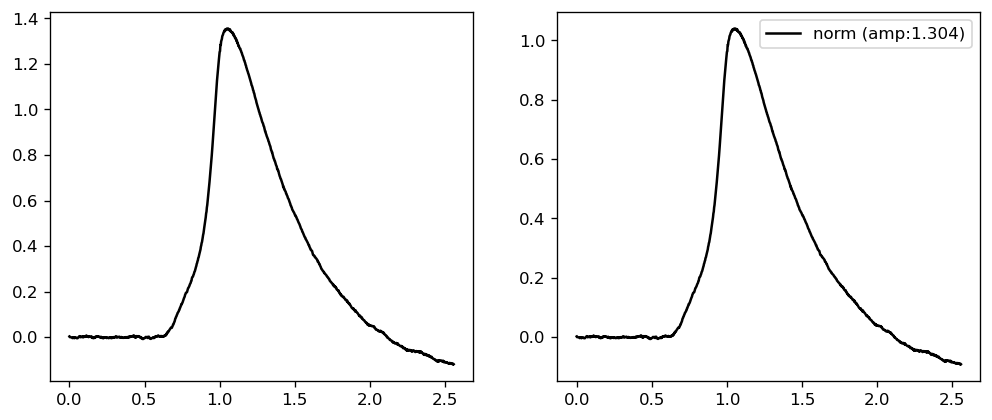

In [161]:
norm22, amp = pulse22.normalize_pulse(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulse22.time, pulse22.data, color='black')
ax[1].plot(pulse22.time, norm22, label=f'norm (amp:{amp:.3f})', color='black')
ax[1].legend()

#### pulse batch

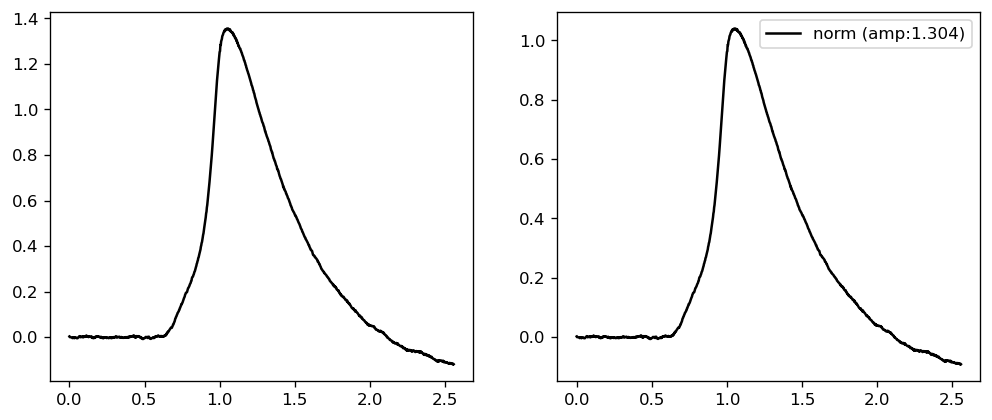

In [162]:
norms22, amps = pulses22.normalize_pulses(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulses22.time, pulses22.data[j], color='black')
ax[1].plot(pulses22.time, norms22[j], label=f'norm (amp:{amps[j]:.3f})', color='black')
ax[1].legend()

## **find peaks**

### single pulse

In [163]:
pulse22 = Pulse(pulse_data22)
peaks22 = pulse22.count_peaks(height=0.2, prominence=0.2)
peaks22

2

### pulse batch

In [164]:
peakss22 = pulses22.count_peaks(height=0.2, prominence=0.2)
peakss22[j]

2

## **L1 norm**

### single pulse

In [165]:
pulse_ref22 = Pulse(df22.iloc[26497].values)
l1_norm22 = pulse22.l1_norm(reference_pulse=pulse_ref22)
l1_norm22

17.276001908194775

### pulse batch

In [166]:
l1_norms22 = pulses22.l1_norm(reference_pulse=pulse_ref22)
l1_norms22[j]

17.276001908194775

## **Normalize derivative** ##

### single pulse

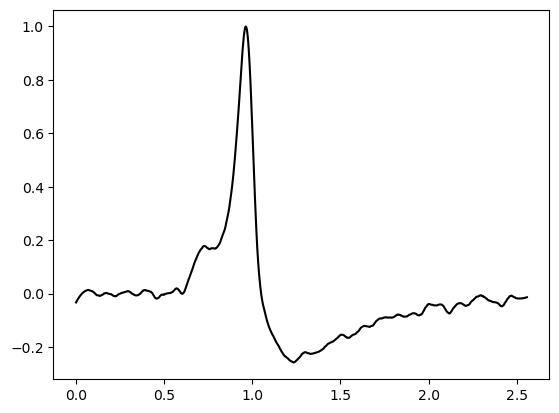

In [167]:
deriv22 = pulse22.normalize_deriv()
plt.plot(pulse22.time, deriv22, color='black')
plt.show()

### pulse batch

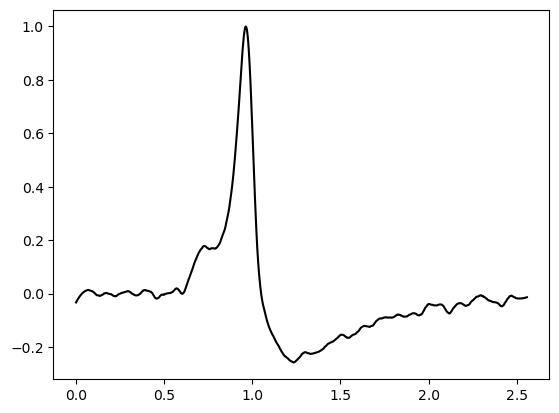

In [168]:
derivs22 = pulses22.normalize_deriv()
plt.plot(pulse22.time, derivs22[j], color='black')
plt.show()

# **Pulse Generator**

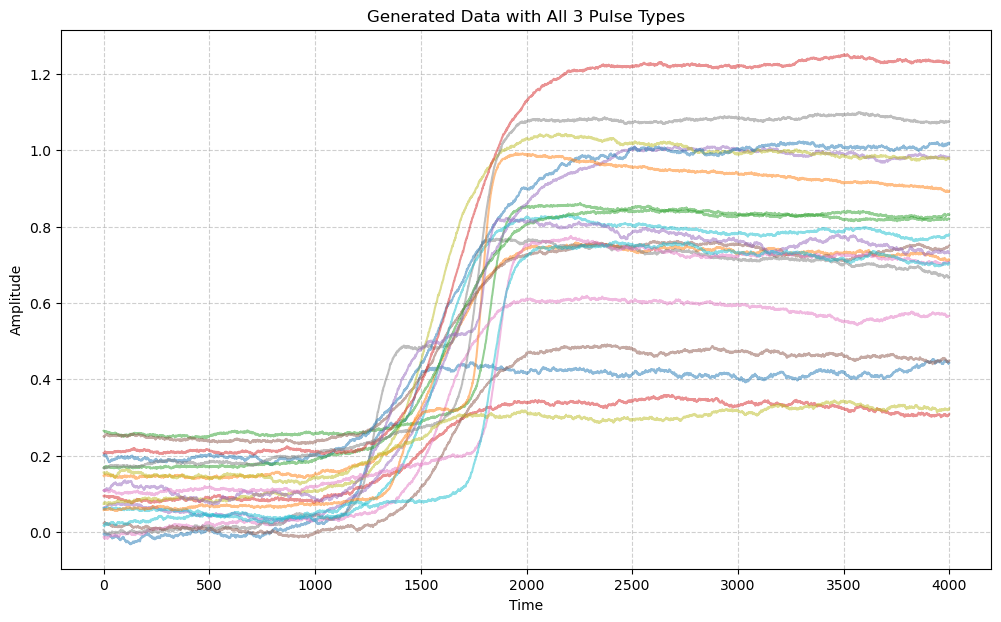

In [ ]:
gen = PulseGenerator()
clean_pulses, noisy_pulses = gen.simulate_pulses(N_SAMPLES=4000, WHITE_NOISE_LEVEL = 0.001, COLORED_NOISE_LEVEL = 0.015)

plt.figure(figsize=(12, 7))
plt.title("Generated Data with All 3 Pulse Types")
plt.xlabel("Time")
plt.ylabel("Amplitude")

for i in range(20):
    plt.plot(noisy_pulses[i], alpha=0.5)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **BIN file access**

In [ ]:
reference = '/directory/to/reference.BIN'
folder = '/directory/to/BIN_folder'

In [ ]:
parser = DataParser(header_file=reference)
df = parser.save_events(folder=folder, channel=0, save_df=False)

number of .BIN files: 4


In [ ]:
df

,channel,timestamp,pulse,energy_ch,energy_cal,energy_short
0,0,96270594894000,"[806, 806, 814, 814, 820, 820, 812, 812, 809, ...",2589,None,None
1,0,110191015304000,"[790, 790, 780, 780, 762, 762, 771, 771, 768, ...",9361,None,None
2,0,172936500030000,"[771, 771, 785, 785, 789, 789, 807, 807, 811, ...",7243,None,None
3,0,261919502418000,"[807, 807, 798, 798, 801, 801, 793, 793, 785, ...",2800,None,None
4,0,387979399974000,"[775, 775, 803, 803, 805, 805, 805, 805, 789, ...",0,None,None
...,...,...,...,...,...,...
2483,0,186367902004082000,"[866, 866, 867, 867, 884, 884, 863, 863, 861, ...",2238,None,None
2484,0,186543447692400000,"[845, 845, 826, 826, 802, 802, 783, 783, 772, ...",18,None,None
2485,0,186745879293806000,"[895, 895, 896, 896, 896, 896, 890, 890, 895, ...",1307,None,None
2486,0,186847770210508000,"[875, 875, 883, 883, 890, 890, 900, 900, 906, ...",10,None,None
